In [1]:
# Importing pandas library
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Importing the csv data files 
data = pd.read_csv('GP03_googleplaystore.csv',error_bad_lines=False, warn_bad_lines=True)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
# Function to print the unique values of a dataset
def print_uniques(dataset, column_list):
    for i in range(len(column_list)):
        print("Unique values for the column:",column_list[i])
        print(dataset[column_list[i]].unique())
        print('\n')
    return

# Printing the unique values for each feature in the dataset
print_uniques(data, data.columns)

Unique values for the column: App
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']


Unique values for the column: Category
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


Unique values for the column: Rating
[ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4

In [5]:
# Function to count the number of null values for each column in a dataset
def count_null_values(dataset, column_list):
    for i in range(len(column_list)):
        print("The total number of null values in :",column_list[i])
        print(dataset[column_list[i]].isnull().sum())
    return

# Printing the null values for each feature in the dataset
count_null_values(data, data.columns)

The total number of null values in : App
0
The total number of null values in : Category
0
The total number of null values in : Rating
1474
The total number of null values in : Reviews
0
The total number of null values in : Size
0
The total number of null values in : Installs
0
The total number of null values in : Type
1
The total number of null values in : Price
0
The total number of null values in : Content Rating
1
The total number of null values in : Genres
0
The total number of null values in : Last Updated
0
The total number of null values in : Current Ver
8
The total number of null values in : Android Ver
3


## Replacing the null ratings with mean

In [6]:
data.loc[(data['Rating'].isnull())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [7]:
average_rating = data['Rating'].mean()
average_rating

4.193338315362448

In [8]:
data['Rating'] = data['Rating'].fillna(data['Rating'].mean())

In [9]:
count_null_values(data, data.columns)

The total number of null values in : App
0
The total number of null values in : Category
0
The total number of null values in : Rating
0
The total number of null values in : Reviews
0
The total number of null values in : Size
0
The total number of null values in : Installs
0
The total number of null values in : Type
1
The total number of null values in : Price
0
The total number of null values in : Content Rating
1
The total number of null values in : Genres
0
The total number of null values in : Last Updated
0
The total number of null values in : Current Ver
8
The total number of null values in : Android Ver
3


In [10]:
data.loc[(data['Rating'] > 5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
data['Rating'] = data['Rating'].replace([19],data['Rating'].mean())

## Anomali in  Category column

In [12]:
data.loc[(data['Category'] == '1.9')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,4.193338,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
data['Category'] = data['Category'].replace(['1.9'],'Uknown')

## Anomali in  Size column

In [14]:
data.loc[(data['Size'] == '1,000+')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,Uknown,4.193338,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [15]:
# Removing the record as the size of the app can not be predicted
data = data[data.Size != '1,000+']

## Anomali in  Type column

In [16]:
data.loc[(data['Type'].isnull())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.193338,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [17]:
data = data.dropna(axis=0, subset=['Type'])

## Anomali in  Current Version column

In [18]:
data.loc[(data['Current Ver'].isnull())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.200000,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.100000,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.200000,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.193338,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.000000,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.193338,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.193338,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.193338,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [19]:
len(data.loc[(data['Current Ver'].isnull())])

8

In [20]:
# Replacing the records with no version record to null
data['Current Ver'] = data['Current Ver'].fillna('Uknown')

## Anomali in  Android Version column

In [21]:
data.loc[(data['Android Ver'].isnull())]
data['Android Ver'] = data['Android Ver'].fillna('Uknown')

In [22]:
# Conveting Megabytes to Kilobytes
data['Size'] = data['Size'].str.replace('M','e+3')
# Removing the k symbol from Kilobytes
data['Size'] = data['Size'].str.replace('k','')
# Replacing the 'Varies with device' with Null
data['Size'] = data['Size'].str.replace('Varies with device', '')
data['Size'] = data['Size'].str.replace('1,000+', '1000')
data.Size=pd.to_numeric(data.Size)

In [23]:
# Exporting the clean dataset
##data.to_csv('clean_df.csv', index=False)

## Data cleaning complete

## Focusing on teenage user group

In [24]:
teen_df = data[data["Content Rating"].isin(['Everyone', 'Everyone 10+', 'Unrated','Teen'])]
teen_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10337 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10337 non-null  object 
 1   Category        10337 non-null  object 
 2   Rating          10337 non-null  float64
 3   Reviews         10337 non-null  object 
 4   Size            8737 non-null   float64
 5   Installs        10337 non-null  object 
 6   Type            10337 non-null  object 
 7   Price           10337 non-null  object 
 8   Content Rating  10337 non-null  object 
 9   Genres          10337 non-null  object 
 10  Last Updated    10337 non-null  object 
 11  Current Ver     10337 non-null  object 
 12  Android Ver     10337 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


## Data Visualization

### Proportion of Paid and Free Application

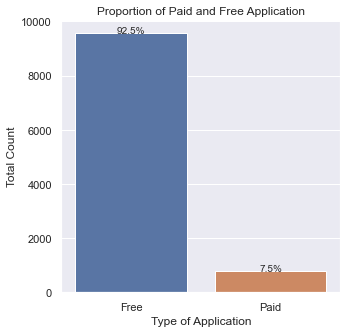

In [25]:
# Visualization of Column- Marital Status
plt.figure(figsize=(5,5))
ax = sns.countplot(x='Type',  data=teen_df)
ax.set(title = "Proportion of Paid and Free Application", xlabel="Type of Application", ylabel = "Total Count")
total = float(len(teen_df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format((height/total)*100),
            ha="center") 
plt.show()



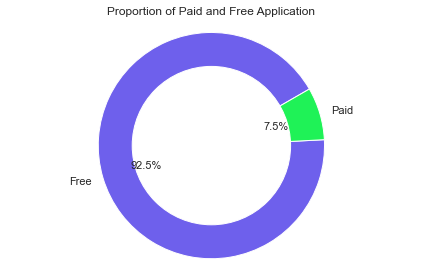

In [26]:
# Displaying the distribution of Marital Status in a Pie chart
labels = teen_df['Type'].unique()
sizes = [92.5, 7.5 ]
#colors
colors = ['#6E60EC','#1FF257']
 
plt.rcParams.update({'font.size': 11})
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=30)
ax1.set_title("Proportion of Paid and Free Application")
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
plt.tight_layout()
plt.show()

### Distribution of ratings in the dataset

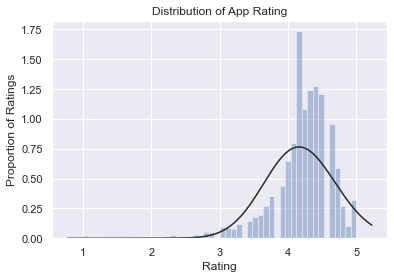

In [27]:
from scipy import stats
sns.distplot(teen_df['Rating'], kde=False, fit=stats.gamma).set(title = 'Distribution of App Rating', xlabel = 'Rating', ylabel = 'Proportion of Ratings' )
plt.show()

### Relationship between Price and Rating

In [28]:
teen_df['Price'] = teen_df['Price'] .map(lambda x: x.lstrip('$'))

#temp1 = teen_df
#temp1 = teen_df.loc[(teen_df['Price'] != '0')]

C:\Users\user\anaconda3New\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
temp1 = teen_df.astype({"Price": float, "Rating": float})
temp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [30]:
temp1.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [31]:
temp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10337 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10337 non-null  object 
 1   Category        10337 non-null  object 
 2   Rating          10337 non-null  float64
 3   Reviews         10337 non-null  object 
 4   Size            8737 non-null   float64
 5   Installs        10337 non-null  object 
 6   Type            10337 non-null  object 
 7   Price           10337 non-null  float64
 8   Content Rating  10337 non-null  object 
 9   Genres          10337 non-null  object 
 10  Last Updated    10337 non-null  object 
 11  Current Ver     10337 non-null  object 
 12  Android Ver     10337 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


## Relationship between Price and Rating Based on Category

In [32]:
temp1['Price'].describe()

count    10337.000000
mean         1.065935
std         16.327721
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

In [33]:
temp2 = temp1[temp1['Price'] < temp1['Price'].quantile(.99)]

In [34]:
temp2['Price'].describe()

count    10228.000000
mean         0.198847
std          0.884911
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: Price, dtype: float64

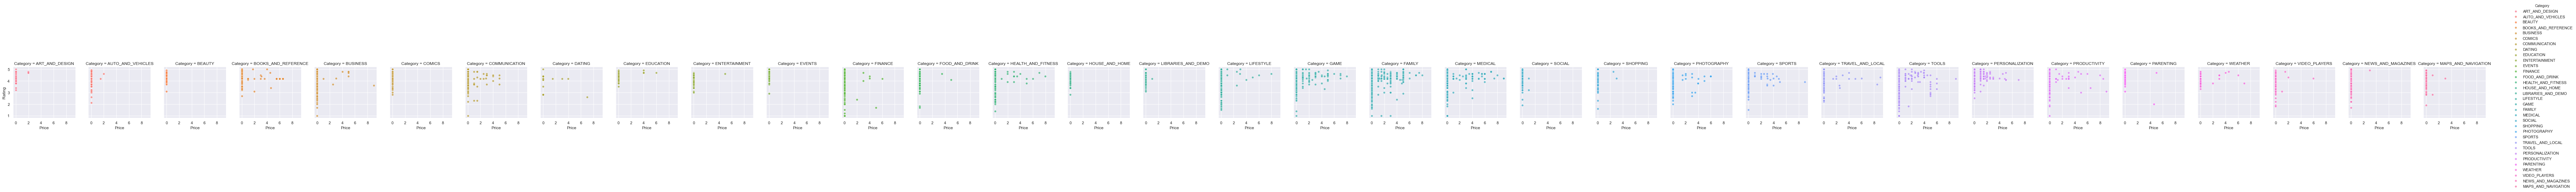

In [35]:
g = sns.FacetGrid(temp2, col="Category", hue="Category")
g.map(sns.scatterplot, "Price", "Rating", alpha=.7)
g.add_legend()


## Correlation between the features

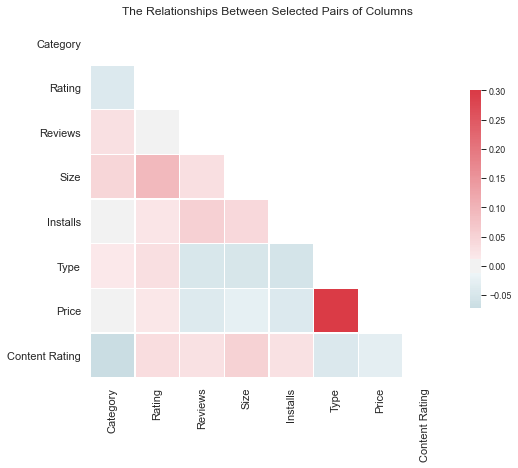

In [36]:
from string import ascii_letters
from sklearn.preprocessing import LabelEncoder

label_endoded_data = teen_df.apply(LabelEncoder().fit_transform)
sns.set(style="white")

# Compute the correlation matrix
corr = label_endoded_data[['Category','Rating','Reviews','Size','Installs','Type','Price','Content Rating']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12, "axes.labelsize":12}) 
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('The Relationships Between Selected Pairs of Columns ')
plt.show()

## Hypothesis Testing

In [37]:
#import sys
#!{sys.executable} -m pip install scipy

In [38]:
from scipy import stats
from scipy.stats import skewtest

In [39]:
skewtest(teen_df['Rating'])

SkewtestResult(statistic=-55.26073052470453, pvalue=0.0)

In [40]:
from numpy.random import seed
seed(1)
from numpy.random import randn
from scipy.stats import wilcoxon

In [41]:
df_1 = teen_df.loc[(teen_df['Category'] == 'LIFESTYLE')]
df_2 = teen_df.loc[(teen_df['Category'] == 'PERSONALIZATION')]

In [42]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 1562 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             373 non-null    object 
 1   Category        373 non-null    object 
 2   Rating          373 non-null    float64
 3   Reviews         373 non-null    object 
 4   Size            340 non-null    float64
 5   Installs        373 non-null    object 
 6   Type            373 non-null    object 
 7   Price           373 non-null    object 
 8   Content Rating  373 non-null    object 
 9   Genres          373 non-null    object 
 10  Last Updated    373 non-null    object 
 11  Current Ver     373 non-null    object 
 12  Android Ver     373 non-null    object 
dtypes: float64(2), object(11)
memory usage: 40.8+ KB


In [43]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 3352 to 10788
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             383 non-null    object 
 1   Category        383 non-null    object 
 2   Rating          383 non-null    float64
 3   Reviews         383 non-null    object 
 4   Size            346 non-null    float64
 5   Installs        383 non-null    object 
 6   Type            383 non-null    object 
 7   Price           383 non-null    object 
 8   Content Rating  383 non-null    object 
 9   Genres          383 non-null    object 
 10  Last Updated    383 non-null    object 
 11  Current Ver     383 non-null    object 
 12  Android Ver     383 non-null    object 
dtypes: float64(2), object(11)
memory usage: 41.9+ KB


In [44]:
df_1 = df_1.sample(n=370, random_state=1)
df_2 = df_2.sample(n=370, random_state=1)

In [45]:
stat, p = wilcoxon(df_1['Rating'], df_2['Rating'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=20668.000, p=0.000
Different distribution (reject H0)
